In [1]:
import numpy as np
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
cd desktop/conda

/Users/mohamedelhalwagy/Desktop/Conda


## creating a keypoint
* using the following functions

### cv.KeyPoint(x, y, size[, angle[, response[, octave[, class_id]]]])
### cv.drawKeypoints(image, keypoints, outImage[, color[, flags]])


In [3]:
# initiating random values which can be later tuned 
kp =cv.KeyPoint(x = 82, y = 85, size =80, angle = 230 )
type(kp)

cv2.KeyPoint

* the type is cv2.KeyPoint which not accepted by drawKeypoints(). We need to transform it to list:

In [4]:
kp1=[]

In [5]:
kp1.extend([kp])
kp1

[< cv2.KeyPoint 0x7fb8427b0750>]

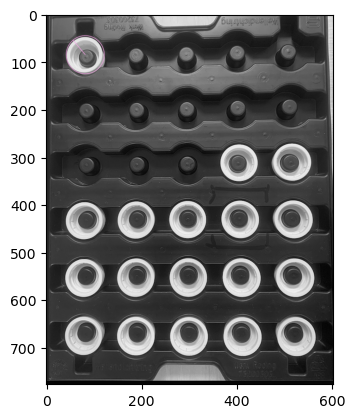

(<matplotlib.image.AxesImage at 0x7fb842af7370>, None)

In [6]:
# then we draw the keypoint using drawKeypoints() using this flag: cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS to make the key point resond to the big size we choose 
img = cv.imread('2.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img= cv.drawKeypoints(gray,kp1,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('keypoints.jpg',img)
plt.imshow(img),plt.show()

## Sift_keypoints algo.

#### Defult values
int 	nfeatures = 0,
int 	nOctaveLayers = 3,
double 	contrastThreshold = 0.04,
double 	edgeThreshold = 10,
double 	sigma = 1.6 

* nfeatures how many keypoints features to be detected 
* nOctaveLayers is for how many layers to be checked (zoomed or dezoomed) 

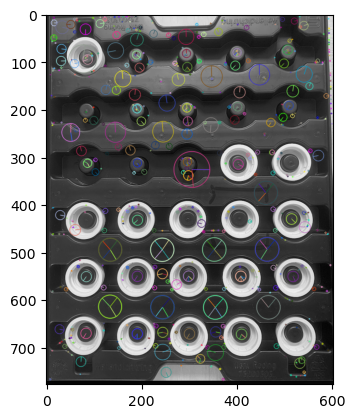

(<matplotlib.image.AxesImage at 0x7fb8466ae1f0>, None)

In [7]:
img = cv.imread('2.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create(nfeatures = 0,nOctaveLayers = 3,contrastThreshold = 0.04, sigma = 1.6)
kp2 = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp2,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img),plt.show()

In [8]:
len(kp2)

554

## extracting the data of the kp

In [9]:
kp2[0].pt 

(8.626877784729004, 766.8280639648438)

In [10]:
kp2[0].size 

4.001070499420166

In [11]:
kp2[0].angle

270.1173095703125

## now we will compute the descriptor of the kp using sift.compute()

Computes the descriptors for a set of keypoints detected in an image or image set

[keypoints , descriptors] = sift.compute(img, keypoints)

In [12]:
img = cv.imread('2.jpg')
# des1 is the descriptor number for the kp_tuple
des1 = sift.compute(img,kp1)
des1

((< cv2.KeyPoint 0x7fb843199fc0>,),
 array([[ 23.,  14.,  31.,  49.,  32.,  25.,  24.,  44.,  10.,   7.,  11.,
          18.,   8.,  23.,  10.,  20.,   1.,   1.,   1.,   0.,   0.,   5.,
           1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  39.,
          15.,  34.,  78.,  41.,  20.,  33.,  91.,  69.,  42.,  58.,  80.,
          55.,  62.,  72., 108.,  33.,  40.,  34.,  42.,  42., 100.,  49.,
          50.,   0.,   1.,   0.,   2.,   1.,   7.,   1.,   0.,  54.,  22.,
          40.,  94.,  50.,  26.,  39., 108.,  85.,  69.,  89., 108.,  78.,
          62.,  79., 108.,  45.,  45.,  45.,  94.,  50.,  59.,  43.,  73.,
           0.,   1.,   0.,   3.,   1.,   4.,   1.,   1.,  58.,  24.,  38.,
          84.,  50.,  30.,  27., 104.,  52.,  17.,  39.,  60.,  26.,  21.,
          55., 108.,   4.,   2.,   5.,  15.,   5.,   3.,   9.,   7.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.]], dtype=float32))

In [13]:
# len of des1 is 2 as first is the keypoint itself and the other is the descriptor
len(des1)

2

## now we want to detect predict the other keypoints using descriptor matching 

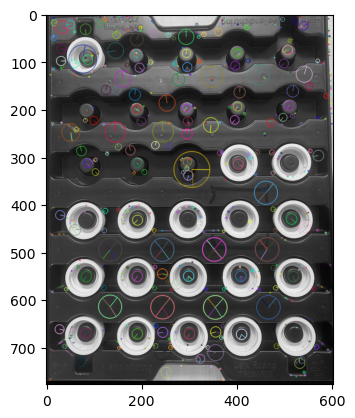

(<matplotlib.image.AxesImage at 0x7fb842970a60>, None)

In [14]:
img = cv.imread('2.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create(nfeatures = 0,nOctaveLayers = 3,contrastThreshold = 0.04, sigma = 1.6)
kp2 = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp2,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img),plt.show()

In [15]:
img = cv.imread('2.jpg')
# des2 is the descriptor number for the kp_tuple
des2 = sift.compute(img,kp2)

- creating to images to match 

In [16]:
img1 = cv.imread('2.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)


In [17]:
img2 = cv.imread('2.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)


### the bf.match() takes the descriptors as np arrays so we have to change them from tuple to np arrays 

In [18]:
type(des1)

tuple

In [19]:
type(des2)

tuple

* first we will delet the keypoints and just keep the descriptors in the tuple

In [20]:
des1 = des1[1]

In [21]:
des2 = des2[1]

In [22]:
des1= np.asarray(des1)

In [23]:
des2= np.asarray(des2)

In [24]:
type(des1)

numpy.ndarray

In [25]:
type(des2)

numpy.ndarray

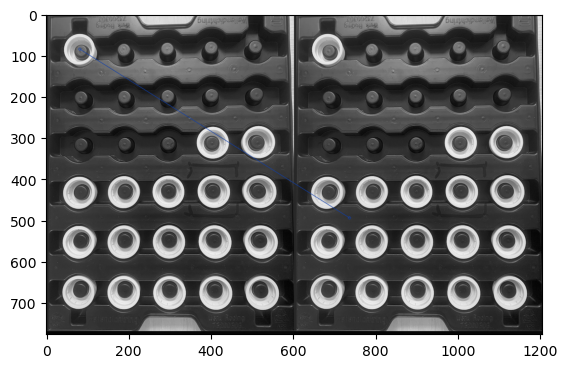

(<matplotlib.image.AxesImage at 0x7fb8463e6430>, None)

In [26]:
#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

# Brute-Force Matcher

### Brute-Force Matching with ORB Descriptors



In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('2.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('2.temp.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

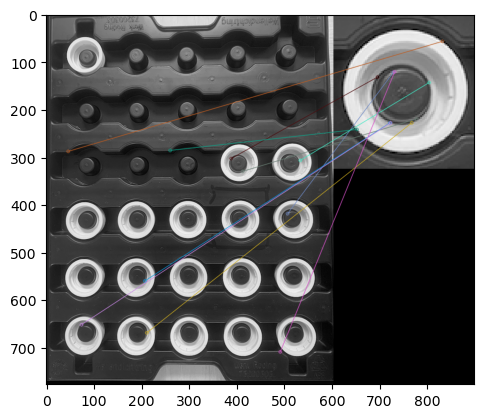

(<matplotlib.image.AxesImage at 0x7fb842a73b80>, None)

In [28]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [29]:
img1 = cv.imread('1.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('1.temp.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

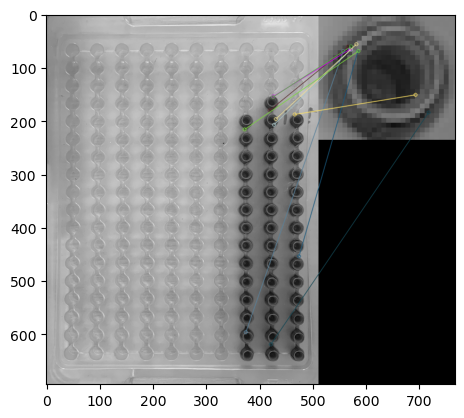

(<matplotlib.image.AxesImage at 0x7fb846394640>, None)

In [30]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## Brute-Force Matching with SIFT Descriptors and Ratio Test to get k best matches



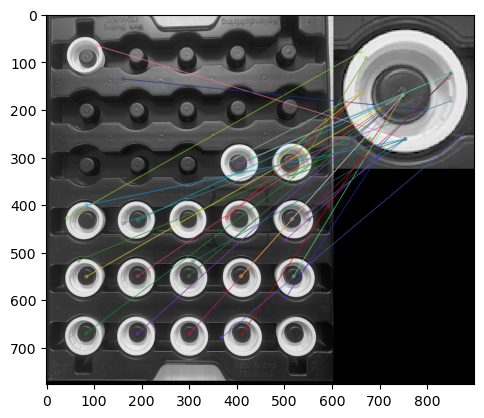

(<matplotlib.image.AxesImage at 0x7fb8433fec70>, None)

In [31]:
img1 = cv.imread('2.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('2.temp.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## FLANN based Matcher
FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets.


In [32]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [33]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

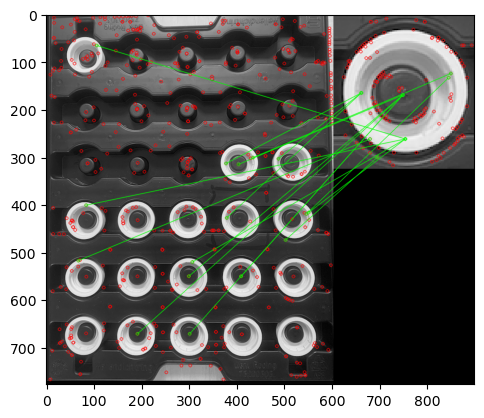

(<matplotlib.image.AxesImage at 0x7fb843c869d0>, None)

In [34]:
img1 = cv.imread('2.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('2.temp.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

# FAST algo for corner detection with nonmaxSuppression
* we have issue here that the keypoint features like size and angle etc .. aren't adjusted like in SURF and SIFT

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  3475


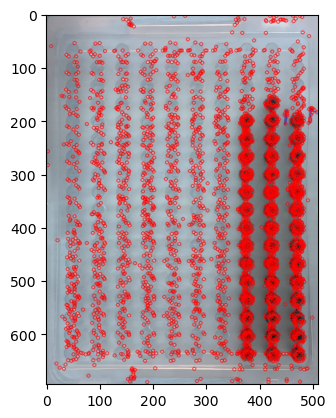

(<matplotlib.image.AxesImage at 0x7fb843989100>, None)

In [35]:
img = cv2.imread('1.jpg')
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find the keypoints on image (grayscale)
kp = fast.detect(gray,None)

# draw keypoints in image
img2 = cv2.drawKeypoints(img, kp, None,color=(255,0,0) )

# Print all default params
print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kp))

# display the image with keypoints drawn on it
plt.imshow(img2,),plt.show()

## refrences 
* https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html
* https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/
* https://aishack.in/tutorials/sift-scale-invariant-feature-transform-features/
* https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html